<a href="https://colab.research.google.com/github/TranHaoDong/BT_AI_TranHaoDong_20146166/blob/main/Tuan2_BT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e06d18784c919548414ffac6fe250265b280fa37924c5e3e978995481d27b1c6
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

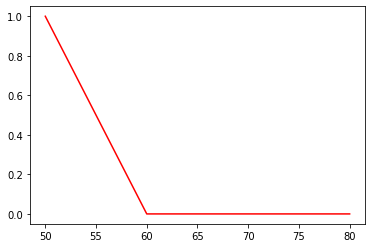

In [ ]:
from IPython.core.interactiveshell import prefilter
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50, 81, 1)
slow = fuzz.trimf(x, [50,50, 60])
plt.figure()
plt.plot (x, slow, 'r', linewidth = 1.5, label = 'slow')
plt.plot

46.0406453091509


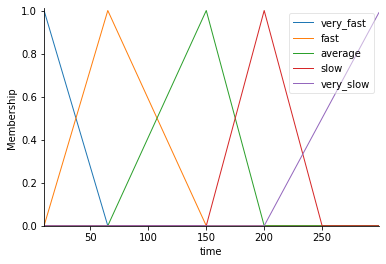

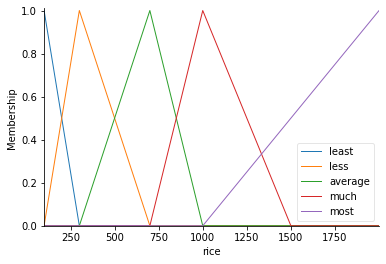

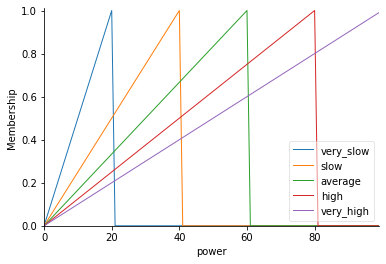

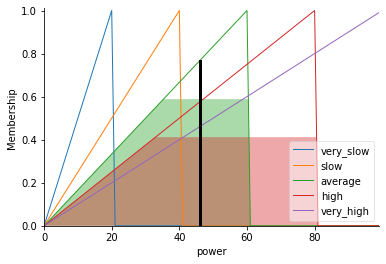

In [30]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,300,1),'time')
rice = ctrl.Antecedent(np.arange(100,2000,1),'rice')
power = ctrl.Consequent(np.arange(0,100,1),'power')
time['very_fast']= fuzz.trimf(time.universe, [10,10,65])
time['fast']= fuzz.trimf(time.universe, [10,65,150])
time['average']= fuzz.trimf(time.universe, [65,150,200])
time['slow']= fuzz.trimf(time.universe, [150,200,250])
time['very_slow']= fuzz.trimf(time.universe, [200,300,301])
time.view()
rice['least'] = fuzz.trimf(rice.universe, [100, 100, 300])
rice['less'] = fuzz.trimf(rice.universe, [100, 300, 700])
rice['average'] = fuzz.trimf(rice.universe, [300, 700, 1000])
rice['much'] = fuzz.trimf(rice.universe, [700, 1000, 1500])
rice['most'] = fuzz.trimf(rice.universe, [1000, 2000, 2001])
rice.view()
power['very_slow'] = fuzz.trimf(power.universe, [0, 20, 20])
power['slow'] = fuzz.trimf(power.universe, [0, 40, 40])
power['average'] = fuzz.trimf(power.universe, [0, 60, 60])
power['high'] = fuzz.trimf(power.universe, [0, 80, 80])
power['very_high'] = fuzz.trimf(power.universe, [0, 100, 101])
power.view()
rule1 = ctrl.Rule(time['very_fast'] & rice['least'], power['very_slow'])
rule2 = ctrl.Rule(time['very_fast'] & rice['less'], power['very_slow'])
rule3 = ctrl.Rule(time['very_fast'] & rice['average'], power['slow'])
rule4 = ctrl.Rule(time['very_fast'] & rice['much'], power['average'])
rule5 = ctrl.Rule(time['very_fast'] & rice['most'], power['high'])
rule6 = ctrl.Rule(time['fast'] & rice['least'], power['very_slow'])
rule7 = ctrl.Rule(time['fast'] & rice['less'], power['slow'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['average'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['average'])
rule10 = ctrl.Rule(time['fast'] & rice['most'], power['high'])
rule11 = ctrl.Rule(time['average'] & rice['least'], power['slow'])
rule12 = ctrl.Rule(time['average'] & rice['less'], power['average'])
rule13 = ctrl.Rule(time['average'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['average'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['average'] & rice['most'], power['very_high'])
rule16 = ctrl.Rule(time['slow'] & rice['least'], power['slow'])
rule17 = ctrl.Rule(time['slow'] & rice['less'], power['average'])
rule18= ctrl.Rule(time['slow'] & rice['average'], power['high'])
rule19= ctrl.Rule(time['slow'] & rice['much'], power['high'])
rule20= ctrl.Rule(time['slow'] & rice['most'], power['very_high'])
rule21 = ctrl.Rule(time['very_slow'] & rice['least'], power['average'])
rule22 = ctrl.Rule(time['very_slow'] & rice['less'], power['high'])
rule23 = ctrl.Rule(time['very_slow'] & rice['average'], power['high'])
rule24 = ctrl.Rule(time['very_slow'] & rice['much'], power['very_high'])
rule25 = ctrl.Rule(time['very_slow'] & rice['most'], power['very_high'])
powering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5,rule6,rule7,rule8,rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 100
powering.input['rice'] = 1000
powering.compute()
print(powering.output['power'])
power.view(sim = powering)
